<a href="https://colab.research.google.com/github/mrsb10/Number-extraction---IDEATEC/blob/main/Copy_of_number_from_image2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Saving c1.jpg to c1.jpg
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

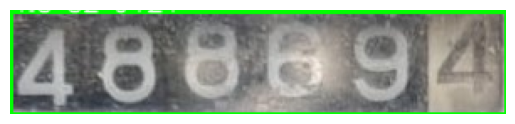

Extracted Numbers: 48829121


In [1]:
!pip install easyocr

import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    IMAGE_PATH = filename

reader = easyocr.Reader(['en'])

img = cv2.imread(IMAGE_PATH)

if img is None:
    print("Error: Could not read the image.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    result = reader.readtext(thresh)

    extracted_numbers = ""

    for (bbox, text, prob) in result:
        top_left = tuple(int(coord) for coord in bbox[0])
        bottom_right = tuple(int(coord) for coord in bbox[2])

        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

        img = cv2.putText(img, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        extracted_numbers += ''.join(c for c in text if c.isdigit())

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print("Extracted Numbers:", extracted_numbers)